In [24]:
import math
import pandas as pd
import numpy as np
import re
import itertools
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import roc_curve, auc, roc_auc_score, accuracy_score, classification_report
from sklearn.decomposition import PCA, SparsePCA
from sklearn.neural_network import MLPClassifier
from sklearn import svm
from sklearn.ensemble import AdaBoostClassifier, VotingClassifier, RandomForestClassifier
from sklearn.preprocessing import MultiLabelBinarizer, Normalizer, StandardScaler, scale
from sklearn.externals import joblib

In [2]:
np.random.seed(seed=2323)

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/romeokienzler/developerWorks/master/train.csv")

In [4]:
df.shape

(42000, 785)

In [5]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

In [6]:
zeros = df.apply(lambda x: not all(x == 0), axis = 0)
df = df[zeros.index[zeros]]
X = df.iloc[:, 1:df.shape[1]].as_matrix()
X = scale(X)

/Users/dominikpeter/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, _DataConversionWarning)


In [7]:
pca = PCA(n_components=3)
Xp = pca.fit_transform(X)

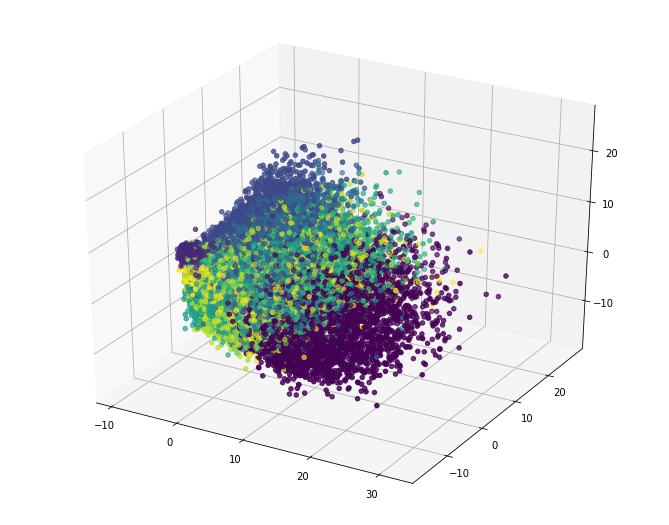

In [8]:
fig = plt.figure(figsize=(9, 7))
ax = Axes3D(fig)

ax.scatter(Xp[:,0], Xp[:,1], Xp[:,2], c = df['label'])
plt.show()

In [9]:
df.head(5)

label  pixel12  pixel13  pixel14  pixel15  pixel32  pixel33  pixel34  \
0      1        0        0        0        0        0        0        0   
1      0        0        0        0        0        0        0        0   
2      1        0        0        0        0        0        0        0   
3      4        0        0        0        0        0        0        0   
4      0        0        0        0        0        0        0        0   

   pixel35  pixel36    ...     pixel770  pixel771  pixel772  pixel773  \
0        0        0    ...            0         0         0         0   
1        0        0    ...            0         0         0         0   
2        0        0    ...            0         0         0         0   
3        0        0    ...            0         0         0         0   
4        0        0    ...            0         0         0         0   

   pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  
0         0         0         0         0         0         0  
1         0         0         0         0         0         0  
2         0         0         0         0         0         0  
3         0         0         0         0         0         0  
4         0         0         0         0         0         0  

[5 rows x 709 columns]

In [10]:
y = df.iloc[:, 0].as_matrix()

In [11]:
X.shape

(42000, 708)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [13]:
print(X_train.shape)
print(X_test.shape)

(33600, 708)
(8400, 708)


In [14]:
rf = RandomForestClassifier(n_estimators=940, n_jobs=2)
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=940, n_jobs=2, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [15]:
y_test_pred = rf.predict(X_test)
y_test_true = y_test

#print(roc_auc_score(y_test_true, y_test_pred, average='macro',sample_weight=None))
print(classification_report(y_test_true, y_test_pred))

             precision    recall  f1-score   support

          0       0.98      0.99      0.98       816
          1       0.98      0.99      0.99       909
          2       0.96      0.96      0.96       846
          3       0.96      0.94      0.95       937
          4       0.96      0.97      0.97       839
          5       0.97      0.96      0.97       702
          6       0.97      0.98      0.97       785
          7       0.97      0.95      0.96       893
          8       0.96      0.96      0.96       835
          9       0.94      0.95      0.94       838

avg / total       0.97      0.97      0.97      8400



In [16]:
scl = svm.SVC(probability=True)
scl.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [17]:
y_test_pred = scl.predict(X_test)
y_test_true = y_test

#print(roc_auc_score(y_test_true, y_test_pred, average='macro',sample_weight=None))
print(classification_report(y_test_true, y_test_pred))

             precision    recall  f1-score   support

          0       0.98      0.98      0.98       816
          1       0.98      0.98      0.98       909
          2       0.91      0.97      0.94       846
          3       0.95      0.94      0.95       937
          4       0.97      0.96      0.97       839
          5       0.95      0.94      0.95       702
          6       0.96      0.97      0.96       785
          7       0.96      0.96      0.96       893
          8       0.96      0.95      0.96       835
          9       0.96      0.93      0.95       838

avg / total       0.96      0.96      0.96      8400



In [18]:
nn = MLPClassifier(solver='lbfgs',
        hidden_layer_sizes=(1000, 500, 200, ), random_state=1, alpha = 1.0000000000000001e-05)

In [19]:
nn.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(1000, 500, 200), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [20]:
y_test_pred = nn.predict(X_test)
y_test_true = y_test

#print(roc_auc_score(y_test_true, y_test_pred, average='macro',sample_weight=None))
print(accuracy_score(y_test_true, y_test_pred, normalize=True, sample_weight=None))

0.969642857143


In [21]:
print(classification_report(y_test_true, y_test_pred))

             precision    recall  f1-score   support

          0       0.99      0.98      0.98       816
          1       0.99      0.98      0.99       909
          2       0.97      0.95      0.96       846
          3       0.97      0.96      0.96       937
          4       0.96      0.97      0.96       839
          5       0.95      0.96      0.96       702
          6       0.97      0.98      0.97       785
          7       0.97      0.97      0.97       893
          8       0.96      0.97      0.97       835
          9       0.96      0.96      0.96       838

avg / total       0.97      0.97      0.97      8400



In [25]:
combi = list(itertools.permutations([1,2,3], 3))

In [28]:
vclf = VotingClassifier(estimators=[('rf', rf),('nn', nn), ('svm', scl)], weights=[1,2,0.5], voting='soft', n_jobs=2)
vclf.fit(X_train, y_train)

VotingClassifier(estimators=[('rf', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_...',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False))],
         n_jobs=2, voting='soft', weights=[1, 2, 0.5])

In [33]:
y_test_pred = vclf.predict(X_test)
y_test_true = y_test

#print(roc_auc_score(y_test_true, y_test_pred, average='macro',sample_weight=None))
print(accuracy_score(y_test_true, y_test_pred, normalize=True, sample_weight=None))

0.970357142857


In [34]:
print(classification_report(y_test_true, y_test_pred))

             precision    recall  f1-score   support

          0       0.99      0.98      0.98       816
          1       0.99      0.99      0.99       909
          2       0.98      0.96      0.97       846
          3       0.97      0.96      0.96       937
          4       0.97      0.96      0.97       839
          5       0.95      0.96      0.96       702
          6       0.97      0.99      0.98       785
          7       0.97      0.97      0.97       893
          8       0.97      0.97      0.97       835
          9       0.96      0.96      0.96       838

avg / total       0.97      0.97      0.97      8400

